# Homework 8: Magnetization, Energy in the Ising Model

Physics 177, Spring 2017 (Prof. Tanedo)  
Due: Friday, June 16    

*Henry Casarez III*

# Problem 0

Please be sure to fill out:
1. The course survey (e-mailed directly to you; e-mail Prof. Tanedo if you have not received this!)
2. iEval course evaluation (http://ieval.ucr.edu)
3. Sign up for a "final interview": https://doodle.com/poll/xyb7dgcupq9gwaqm

# Problem 1

Code the Ising model to study the phase transition at $T_c\approx 2.27$ (in units where $J = k_B = 1$). Use the Metropolis algorithm for Markov Chain Monte Carlo, as we set up in Lecture 18: https://github.com/Physics177-2017/Lec18-Ising-Model/blob/master/Lec18-IsingModel.ipynb

**Make the following plots:**
1. Magnetization as a function of temperature
2. Energy as a function of temperature

You may define magnetization as the total spin of the system (sum of the spins of each node). You may define the energy as the sum of $\Delta E_i$ for each spin $i$. Recall that 

$$\Delta E_i = -\sum_{j} s_is_j$$

(Note: actually, you should define $E = \sum_i \Delta E_i/4$, but we don't care about the overall pre-factors, we just want to see the qualitative shapes of the plots.)

**Guidelines**
You should be able to get reasonable results for:
* A $20\times 20$ array.
* Sampling 1000 temperature points between $T=1$ and $T=4$
* Allowing 2000 Monte Carlo steps to draw a sample.

*Pro-tip:* One way to improve your calculations is to let your Monte Carlo "equilibrate" before recording data. In other words, your Markov Chain algorithm should be:

1. Pick a random configuration
2. Run for 2000 steps (without recording data)
3. Perform your Markov Chain algorithm as usual, using the configuration at the end of step 2 as your initial configuration.


Code this up on your own, you may use the code from Lecture 18 as a starting point. 

The *answers* are available in a notebook written by Rajesh Singh:
http://rajeshrinet.github.io/blog/2014/ising-model/
... you may use that notebook (in particular, the plots) as a guideline for what your code should produce. 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand
from random import *
"""creation of code"""
def takea_spin(the_grid, beta, i, j):
    
    spin = the_grid[i,j]
    spin_flipped = -spin


    total_spin =  the_grid[(i+1)%N,j] +  the_grid[(i-1)%N,j] +  the_grid[i,(j+1)%N] + the_grid[i,(j-1)%N]
        
    deltaE = ((total_spin*-spin_flipped)/4) -((total_spin*-spin)/4)
        
    if deltaE < 0:
        return -spin
    
    else:
        return spin
        
        
def update_grid(the_grid, beta):
    i = randint(0,N-1)
    j = randint(0,N-1)
    the_grid[i,j] = takea_spin(the_grid, beta, i, j)
    return the_grid

def magnetization(the_grid):
    return np.sum(the_grid)

def energy(the_grid):
    E=0
    for i in range(len(the_grid)):
        for j in range(len(the_grid)):
            spin=the_grid[i,j]
            nb = the_grid[(i+1)%N, j] + the_grid[i,(j+1)%N] + the_grid[(i-1)%N, j] + the_grid[i,(j-1)%N]
            E += -nb*spin
    return E

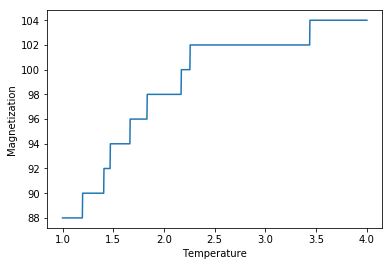

In [26]:
"""Plotting & Taking Values"""

"""Temperature goes from 1 to 4"""

%matplotlib inline
T=np.linspace(1,4,1000)
recorded_M=[]
recorded_E=[]

N=20
grid=np.zeros((N,N))
for i in range(N):
    for j in range(N):
        grid[i][j] = 2*randint(0,1) - 1 

for l in range(2000):
    update_grid(grid,1)
for l in range(1000):
    beta=1/T[l] 
    recorded_M.append(magnetization(grid))
    recorded_E.append(energy(grid))
    update_grid(grid,beta)
    
np.array(recorded_M)
np.array(recorded_E)

plt.plot(T,recorded_M)
plt.xlabel('Temperature')
plt.ylabel('Magnetization')

plt.show()

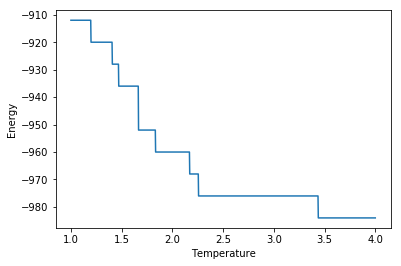

In [27]:
plt.plot(T,recorded_E)
plt.xlabel('Temperature')
plt.ylabel('Energy')

### Wow my graphs are sooooooo pretty! Oh geez. Please grade with mercy Corey. It was finals week and unfortanetly I caught a very bad cold and could not focus or study well. pls. :'(